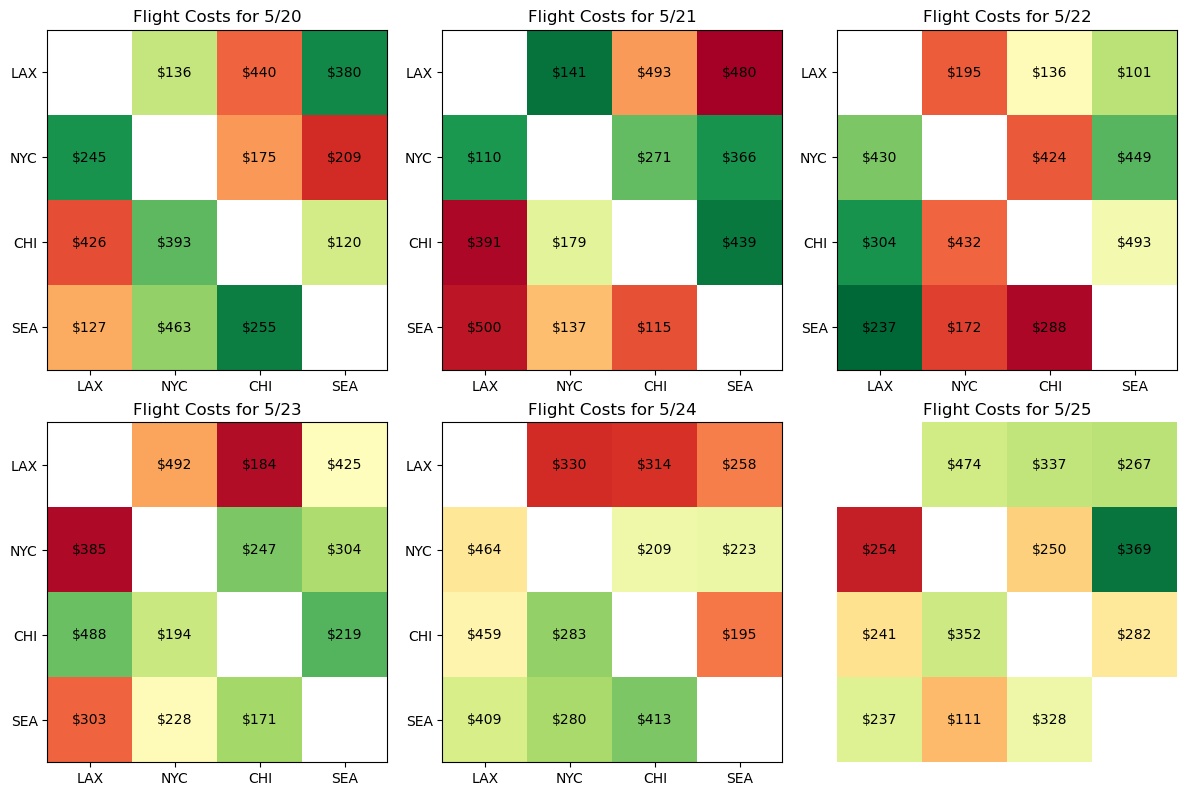

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

airports = ["LAX", "NYC", "CHI", "SEA"]
dates = ["5/20", "5/21", "5/22", "5/23", "5/24", "5/25"]

flight_costs = {}

for date in dates:
    for dep in airports:
        for arr in airports:
            if dep != arr:  # Exclude same-airport routes
                flight_costs[(dep, arr, date)] = random.randint(100, 500)

airport_indices = {"LAX": 0, "NYC": 1, "CHI": 2, "SEA": 3}
num_airports = len(airports)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns for 6 dates
axes = axes.flatten()  # Flatten axes for easier iteration

for i, date in enumerate(dates):
    ax = axes[i]
    
    # Create an empty cost matrix filled with NaN values for this date
    cost_matrix = np.full((num_airports, num_airports), np.nan)
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost_matrix[airport_indices[dep], airport_indices[arr]] = flight_costs[(dep, arr, date)]

    # Plot the heatmap using imshow, with the flight cost data
    cax = ax.imshow(cost_matrix, cmap='RdYlGn_r', vmin=100, vmax=500)  # Use the desired colormap and range
    
    # Overlay the text labels within the boxes
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                ax.text(airport_indices[dep], airport_indices[arr], f"${cost}",
                        ha='center', va='center', fontsize=10, color='black')

    # Label axes
    ax.set_xticks(range(num_airports))
    ax.set_xticklabels(airports)
    ax.set_yticks(range(num_airports))
    ax.set_yticklabels(airports)
    ax.set_title(f"Flight Costs for {date}")

# Add a single colorbar for the heatmap

axes[-1].axis('off')  # Hide the extra subplot since there are only 5 dates

# Adjust layout and display
plt.tight_layout()
plt.show()


### gavin test

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

airports = ["LAX", "NYC", "CHI", "SEA"]
dates = ["5/20", "5/21", "5/22"]  # 3 days

flight_costs = {}

for date in dates:
    for dep in airports:
        for arr in airports:
            if dep != arr:  # Exclude same-airport routes
                flight_costs[(dep, arr, date)] = random.randint(100, 500)

airport_indices = {"LAX": 0, "NYC": 1, "CHI": 2, "SEA": 3}
num_airports = len(airports)

# Create a custom colormap - light blue to dark blue
colors = [(0.9, 0.95, 1), (0.7, 0.85, 1), (0.5, 0.7, 0.9), (0.3, 0.5, 0.8), (0.1, 0.2, 0.6)]
blue_cmap = LinearSegmentedColormap.from_list('blue_gradient', colors)

# Create a figure for each date and save as PNG
for date in dates:
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create an empty cost matrix filled with NaN values for this date
    cost_matrix = np.full((num_airports, num_airports), np.nan)
    
    # Find the lowest and second lowest prices for this date
    all_prices = []
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                cost_matrix[airport_indices[dep], airport_indices[arr]] = cost
                all_prices.append((cost, dep, arr))
    
    # Sort prices to find lowest and second lowest
    all_prices.sort()
    lowest_price, lowest_dep, lowest_arr = all_prices[0]
    second_price, second_dep, second_arr = all_prices[1]
    
    # Plot the heatmap using imshow with our custom blue colormap
    cax = ax.imshow(cost_matrix, cmap=blue_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar = plt.colorbar(cax, ax=ax)
    cbar.set_label('Flight Cost ($)')
    
    # Overlay the text labels and highlight the lowest price
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Determine text color and cell highlight
                if dep == lowest_dep and arr == lowest_arr:
                    # Highlight the lowest price with a black rectangle
                    rect = plt.Rectangle((airport_indices[arr]-0.5, airport_indices[dep]-0.5), 1, 1, 
                                         fill=False, edgecolor='black', linewidth=3)
                    ax.add_patch(rect)
                    text_color = 'black'  # Changed to black
                    fontweight = 'bold'   # Keeping bold
                else:
                    text_color = 'black'
                    fontweight = 'normal'
                
                ax.text(airport_indices[arr], airport_indices[dep], f"${cost}",
                        ha='center', va='center', fontsize=10, 
                        color=text_color, fontweight=fontweight)
    
    # Label axes
    ax.set_xticks(range(num_airports))
    ax.set_xticklabels(airports)
    ax.set_yticks(range(num_airports))
    ax.set_yticklabels(airports)
    ax.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save as PNG in the imgs directory
    plt.tight_layout()
    filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # Now create a second figure highlighting the second lowest price
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    
    # Plot the same heatmap
    cax2 = ax2.imshow(cost_matrix, cmap=blue_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar2 = plt.colorbar(cax2, ax=ax2)
    cbar2.set_label('Flight Cost ($)')
    
    # Overlay the text labels and highlight the second lowest price
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Determine text color and cell highlight
                if dep == second_dep and arr == second_arr:
                    # Highlight the second lowest price with a black rectangle
                    rect = plt.Rectangle((airport_indices[arr]-0.5, airport_indices[dep]-0.5), 1, 1, 
                                         fill=False, edgecolor='black', linewidth=3)
                    ax2.add_patch(rect)
                    text_color = 'black'  # Changed to black
                    fontweight = 'bold'   # Keeping bold
                else:
                    text_color = 'black'
                    fontweight = 'normal'
                
                ax2.text(airport_indices[arr], airport_indices[dep], f"${cost}",
                        ha='center', va='center', fontsize=10, 
                        color=text_color, fontweight=fontweight)
    
    # Label axes
    ax2.set_xticks(range(num_airports))
    ax2.set_xticklabels(airports)
    ax2.set_yticks(range(num_airports))
    ax2.set_yticklabels(airports)
    ax2.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save second PNG in the imgs directory
    plt.tight_layout()
    second_filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}_second_lowest.png")
    plt.savefig(second_filename, dpi=300, bbox_inches='tight')
    
    plt.close('all')  # Close all figures to free memory
    
    print(f"Saved {filename} and {second_filename}")

Saved imgs\flight_costs_5_20.png and imgs\flight_costs_5_20_second_lowest.png
Saved imgs\flight_costs_5_21.png and imgs\flight_costs_5_21_second_lowest.png
Saved imgs\flight_costs_5_22.png and imgs\flight_costs_5_22_second_lowest.png


In [7]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

airports = ["LAX", "NYC", "CHI", "SEA"]
dates = ["5/20", "5/21", "5/22"]  # 3 days

flight_costs = {}

for date in dates:
    for dep in airports:
        for arr in airports:
            if dep != arr:  # Exclude same-airport routes
                flight_costs[(dep, arr, date)] = random.randint(100, 500)

airport_indices = {"LAX": 0, "NYC": 1, "CHI": 2, "SEA": 3}
num_airports = len(airports)

# Create a custom soft grayscale colormap that's not too harsh at extremes
# Using light gray to medium gray instead of white to black
colors = [(0.9, 0.9, 0.9), (0.8, 0.8, 0.8), (0.7, 0.7, 0.7), (0.6, 0.6, 0.6), (0.5, 0.5, 0.5)]
soft_gray_cmap = LinearSegmentedColormap.from_list('soft_gray', colors)

# Create a figure for each date
for date in dates:
    # Focus on second-lowest price for special visualization
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    
    # Create an empty cost matrix filled with NaN values
    cost_matrix = np.full((num_airports, num_airports), np.nan)
    
    # Find the lowest and second lowest prices
    all_prices = []
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                cost_matrix[airport_indices[dep], airport_indices[arr]] = cost
                all_prices.append((cost, dep, arr))
    
    # Sort prices to find lowest and second lowest
    all_prices.sort()
    lowest_price, lowest_dep, lowest_arr = all_prices[0]
    second_price, second_dep, second_arr = all_prices[1]
    
    # Create a custom colormap (soft grayscale) for the base plot
    base_plot = ax2.imshow(cost_matrix, cmap=soft_gray_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar2 = plt.colorbar(base_plot, ax=ax2)
    cbar2.set_label('Flight Cost ($)')
    
    # Overlay the text labels
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Default to grayscale
                text_color = 'black'
                fontweight = 'normal'
                
                # Special highlighting for the second lowest price
                if dep == second_dep and arr == second_arr:
                    # Highlight with the rectangle
                    rect = plt.Rectangle((airport_indices[arr]-0.5, airport_indices[dep]-0.5), 1, 1, 
                                         fill=True, edgecolor='black', facecolor='green', 
                                         linewidth=3, alpha=0.5)
                    ax2.add_patch(rect)
                    text_color = 'black'
                    fontweight = 'bold'
                
                ax2.text(airport_indices[arr], airport_indices[dep], f"${cost}",
                         ha='center', va='center', fontsize=10, 
                         color=text_color, fontweight=fontweight)
    
    # Label axes
    ax2.set_xticks(range(num_airports))
    ax2.set_xticklabels(airports)
    ax2.set_yticks(range(num_airports))
    ax2.set_yticklabels(airports)
    ax2.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save second PNG in the imgs directory
    plt.tight_layout()
    second_filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}_second_lowest_green.png")
    plt.savefig(second_filename, dpi=300, bbox_inches='tight')
    
    plt.close('all')  # Close all figures to free memory
    
    print(f"Saved special highlight visualization: {second_filename}")

Saved special highlight visualization: imgs/flight_costs_5_20_second_lowest_green.png
Saved special highlight visualization: imgs/flight_costs_5_21_second_lowest_green.png
Saved special highlight visualization: imgs/flight_costs_5_22_second_lowest_green.png


In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

# Set random seed to ensure consistent results between visualizations
random.seed(42)

airports = ["LAX", "NYC", "CHI", "SEA"]
dates = ["5/20", "5/21", "5/22"]  # 3 days

flight_costs = {}

for date in dates:
    for dep in airports:
        for arr in airports:
            if dep != arr:  # Exclude same-airport routes
                flight_costs[(dep, arr, date)] = random.randint(100, 500)

airport_indices = {"LAX": 0, "NYC": 1, "CHI": 2, "SEA": 3}
num_airports = len(airports)

# Create a custom colormap - light blue to dark blue
colors_blue = [(0.9, 0.95, 1), (0.7, 0.85, 1), (0.5, 0.7, 0.9), (0.3, 0.5, 0.8), (0.1, 0.2, 0.6)]
blue_cmap = LinearSegmentedColormap.from_list('blue_gradient', colors_blue)

# Create a custom soft grayscale colormap
colors_gray = [(0.9, 0.9, 0.9), (0.8, 0.8, 0.8), (0.7, 0.7, 0.7), (0.6, 0.6, 0.6), (0.5, 0.5, 0.5)]
soft_gray_cmap = LinearSegmentedColormap.from_list('soft_gray', colors_gray)

# Create visualizations for each date
for date in dates:
    # Create an empty cost matrix filled with NaN values for this date
    cost_matrix = np.full((num_airports, num_airports), np.nan)
    
    # Find the lowest and second lowest prices for this date
    all_prices = []
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                cost_matrix[airport_indices[dep], airport_indices[arr]] = cost
                all_prices.append((cost, dep, arr))
    
    # Sort prices to find lowest and second lowest
    all_prices.sort()
    lowest_price, lowest_dep, lowest_arr = all_prices[0]
    second_price, second_dep, second_arr = all_prices[1]
    
    #-------------------------------------------------------------------------------
    # VISUALIZATION 1: Blue gradient with lowest price highlighted in black
    #-------------------------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the heatmap using imshow with our custom blue colormap
    cax = ax.imshow(cost_matrix, cmap=blue_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar = plt.colorbar(cax, ax=ax)
    cbar.set_label('Flight Cost ($)')
    
    # Overlay the text labels and highlight the lowest price with black
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Determine text color and cell highlight
                if dep == lowest_dep and arr == lowest_arr:
                    # Highlight the lowest price with a black rectangle
                    rect = plt.Rectangle((airport_indices[arr]-0.5, airport_indices[dep]-0.5), 1, 1, 
                                         fill=False, edgecolor='black', linewidth=3)
                    ax.add_patch(rect)
                    text_color = 'black'
                    fontweight = 'bold'
                else:
                    text_color = 'black'
                    fontweight = 'normal'
                
                ax.text(airport_indices[arr], airport_indices[dep], f"${cost}",
                        ha='center', va='center', fontsize=10, 
                        color=text_color, fontweight=fontweight)
    
    # Label axes
    ax.set_xticks(range(num_airports))
    ax.set_xticklabels(airports)
    ax.set_yticks(range(num_airports))
    ax.set_yticklabels(airports)
    ax.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save as PNG in the imgs directory
    plt.tight_layout()
    filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    #-------------------------------------------------------------------------------
    # VISUALIZATION 2: Soft grayscale with second lowest price highlighted in green
    #-------------------------------------------------------------------------------
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    
    # Create a custom colormap (soft grayscale) for the base plot
    base_plot = ax2.imshow(cost_matrix, cmap=soft_gray_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar2 = plt.colorbar(base_plot, ax=ax2)
    cbar2.set_label('Flight Cost ($)')
    
    # Overlay the text labels
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Default to grayscale
                text_color = 'black'
                fontweight = 'normal'
                
                # Special highlighting for the second lowest price
                if dep == second_dep and arr == second_arr:
                    # Highlight with the rectangle
                    rect = plt.Rectangle((airport_indices[arr]-0.5, airport_indices[dep]-0.5), 1, 1, 
                                         fill=True, edgecolor='black', facecolor='green', 
                                         linewidth=3, alpha=0.5)
                    ax2.add_patch(rect)
                    text_color = 'black'
                    fontweight = 'bold'
                
                ax2.text(airport_indices[arr], airport_indices[dep], f"${cost}",
                         ha='center', va='center', fontsize=10, 
                         color=text_color, fontweight=fontweight)
    
    # Label axes
    ax2.set_xticks(range(num_airports))
    ax2.set_xticklabels(airports)
    ax2.set_yticks(range(num_airports))
    ax2.set_yticklabels(airports)
    ax2.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save second PNG in the imgs directory
    plt.tight_layout()
    second_filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}_second_lowest_green.png")
    plt.savefig(second_filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Saved visualizations for {date}:")
    print(f"  - {filename} (blue with lowest price highlighted)")
    print(f"  - {second_filename} (grayscale with second lowest price in green)")

print("\nAll visualizations complete!")

Saved visualizations for 5/20:
  - imgs/flight_costs_5_20.png (blue with lowest price highlighted)
  - imgs/flight_costs_5_20_second_lowest_green.png (grayscale with second lowest price in green)
Saved visualizations for 5/21:
  - imgs/flight_costs_5_21.png (blue with lowest price highlighted)
  - imgs/flight_costs_5_21_second_lowest_green.png (grayscale with second lowest price in green)
Saved visualizations for 5/22:
  - imgs/flight_costs_5_22.png (blue with lowest price highlighted)
  - imgs/flight_costs_5_22_second_lowest_green.png (grayscale with second lowest price in green)

All visualizations complete!


In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

# Set random seed to ensure consistent results between visualizations
random.seed(42)

cities = ["LAX", "NYC", "CHI", "SEA"]
dates = ["5/20", "5/21", "5/22"]  # 3 days

flight_costs = {}

for date in dates:
    for dep in cities:
        for arr in cities:
            if dep != arr:  # Exclude same-city routes
                flight_costs[(dep, arr, date)] = random.randint(100, 500)

city_indices = {"LAX": 0, "NYC": 1, "CHI": 2, "SEA": 3}
num_cities = len(cities)

# Create a custom colormap - light blue to dark blue
colors_blue = [(0.9, 0.95, 1), (0.7, 0.85, 1), (0.5, 0.7, 0.9), (0.3, 0.5, 0.8), (0.1, 0.2, 0.6)]
blue_cmap = LinearSegmentedColormap.from_list('blue_gradient', colors_blue)

# Create a custom soft grayscale colormap
colors_gray = [(0.9, 0.9, 0.9), (0.8, 0.8, 0.8), (0.7, 0.7, 0.7), (0.6, 0.6, 0.6), (0.5, 0.5, 0.5)]
soft_gray_cmap = LinearSegmentedColormap.from_list('soft_gray', colors_gray)

# Create visualizations for each date
for date in dates:
    # Create an empty cost matrix filled with NaN values for this date
    cost_matrix = np.full((num_cities, num_cities), np.nan)
    
    # Find the lowest and second lowest prices for this date
    all_prices = []
    for dep in cities:
        for arr in cities:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                cost_matrix[city_indices[dep], city_indices[arr]] = cost
                all_prices.append((cost, dep, arr))
    
    # Sort prices to find lowest and second lowest
    all_prices.sort()
    lowest_price, lowest_dep, lowest_arr = all_prices[0]
    second_price, second_dep, second_arr = all_prices[1]
    
    #-------------------------------------------------------------------------------
    # VISUALIZATION 1: Blue gradient with lowest price highlighted in black
    #-------------------------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the heatmap using imshow with our custom blue colormap
    cax = ax.imshow(cost_matrix, cmap=blue_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar = plt.colorbar(cax, ax=ax)
    cbar.set_label('Flight Cost ($)')
    
    # Overlay the text labels and highlight the lowest price with black
    for dep in cities:
        for arr in cities:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Determine text color and cell highlight
                if dep == lowest_dep and arr == lowest_arr:
                    # Highlight the lowest price with a black rectangle
                    rect = plt.Rectangle((city_indices[arr]-0.5, city_indices[dep]-0.5), 1, 1, 
                                         fill=False, edgecolor='black', linewidth=3)
                    ax.add_patch(rect)
                    text_color = 'black'
                    fontweight = 'bold'
                else:
                    text_color = 'black'
                    fontweight = 'normal'
                
                ax.text(city_indices[arr], city_indices[dep], f"${cost}",
                        ha='center', va='center', fontsize=10, 
                        color=text_color, fontweight=fontweight)
    
    # Label axes
    ax.set_xlabel('Departure City')
    ax.set_ylabel('Arrival City')
    ax.set_xticks(range(num_cities))
    ax.set_xticklabels(cities)
    ax.set_yticks(range(num_cities))
    ax.set_yticklabels(cities)
    ax.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save as PNG in the imgs directory
    plt.tight_layout()
    filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    #-------------------------------------------------------------------------------
    # VISUALIZATION 2: Soft grayscale with second lowest price highlighted in green
    #-------------------------------------------------------------------------------
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    
    # Create a custom colormap (soft grayscale) for the base plot
    base_plot = ax2.imshow(cost_matrix, cmap=soft_gray_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar2 = plt.colorbar(base_plot, ax=ax2)
    cbar2.set_label('Flight Cost ($)')
    
    # Overlay the text labels
    for dep in cities:
        for arr in cities:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Default to grayscale
                text_color = 'black'
                fontweight = 'normal'
                
                # Special highlighting for the second lowest price
                if dep == second_dep and arr == second_arr:
                    # Highlight with the rectangle
                    rect = plt.Rectangle((city_indices[arr]-0.5, city_indices[dep]-0.5), 1, 1, 
                                         fill=True, edgecolor='black', facecolor='green', 
                                         linewidth=3, alpha=0.5)
                    ax2.add_patch(rect)
                    text_color = 'black'
                    fontweight = 'bold'
                
                ax2.text(city_indices[arr], city_indices[dep], f"${cost}",
                         ha='center', va='center', fontsize=10, 
                         color=text_color, fontweight=fontweight)
    
    # Label axes
    ax2.set_xlabel('Departure City')
    ax2.set_ylabel('Arrival City')
    ax2.set_xticks(range(num_cities))
    ax2.set_xticklabels(cities)
    ax2.set_yticks(range(num_cities))
    ax2.set_yticklabels(cities)
    ax2.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save second PNG in the imgs directory
    plt.tight_layout()
    second_filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}_second_lowest_green.png")
    plt.savefig(second_filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Saved visualizations for {date}:")
    print(f"  - {filename} (blue with lowest price highlighted)")
    print(f"  - {second_filename} (grayscale with second lowest price in green)")

print("\nAll visualizations complete!")

Saved visualizations for 5/20:
  - imgs/flight_costs_5_20.png (blue with lowest price highlighted)
  - imgs/flight_costs_5_20_second_lowest_green.png (grayscale with second lowest price in green)
Saved visualizations for 5/21:
  - imgs/flight_costs_5_21.png (blue with lowest price highlighted)
  - imgs/flight_costs_5_21_second_lowest_green.png (grayscale with second lowest price in green)
Saved visualizations for 5/22:
  - imgs/flight_costs_5_22.png (blue with lowest price highlighted)
  - imgs/flight_costs_5_22_second_lowest_green.png (grayscale with second lowest price in green)

All visualizations complete!


In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

# Set random seed to ensure consistent results
random.seed(42)

# Setup cities and dates
departure_city = "CHI"
destination_cities = ["LAX", "NYC", "SEA"]
dates = ["5/21", "5/22"]

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

# Generate flight costs
flight_costs = {}
for date in dates:
    for dest in destination_cities:
        flight_costs[(departure_city, dest, date)] = random.randint(100, 500)

# Create a custom colormap - light blue to dark blue
colors_blue = [(0.9, 0.95, 1), (0.7, 0.85, 1), (0.5, 0.7, 0.9), (0.3, 0.5, 0.8), (0.1, 0.2, 0.6)]
blue_cmap = LinearSegmentedColormap.from_list('blue_gradient', colors_blue)

# Create a custom soft grayscale colormap
colors_gray = [(0.9, 0.9, 0.9), (0.8, 0.8, 0.8), (0.7, 0.7, 0.7), (0.6, 0.6, 0.6), (0.5, 0.5, 0.5)]
soft_gray_cmap = LinearSegmentedColormap.from_list('soft_gray', colors_gray)

# Find the lowest and second highest prices
all_prices = []
for date in dates:
    for dest in destination_cities:
        cost = flight_costs[(departure_city, dest, date)]
        all_prices.append((cost, departure_city, dest, date))

# Sort prices to find second highest (reverse=True for descending order)
all_prices.sort(reverse=True)
highest_price, _, highest_dest, highest_date = all_prices[0]
second_highest_price, _, second_highest_dest, second_highest_date = all_prices[1]

# Create a single figure with 3 subplots
plt.figure(figsize=(15, 5))
gs = GridSpec(1, 3, figure=plt.gcf())

# Create bar chart data
x = np.arange(len(destination_cities))
width = 0.35

# ----------------------------------------------------------------------------
# SUBPLOT 1: Flights on May 21st
# ----------------------------------------------------------------------------
ax1 = plt.subplot(gs[0, 0])
costs_day1 = [flight_costs[(departure_city, dest, dates[0])] for dest in destination_cities]
bars1 = ax1.bar(x, costs_day1, width, color='skyblue', edgecolor='black')
ax1.set_ylabel('Flight Cost ($)')
ax1.set_title(f'Flights from Chicago - {dates[0]}')
ax1.set_xticks(x)
ax1.set_xticklabels(destination_cities)
ax1.set_xlabel('Destination City')

# Add cost labels above each bar
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'${height}', ha='center', va='bottom')

# ----------------------------------------------------------------------------
# SUBPLOT 2: Flights on May 22nd
# ----------------------------------------------------------------------------
ax2 = plt.subplot(gs[0, 1])
costs_day2 = [flight_costs[(departure_city, dest, dates[1])] for dest in destination_cities]
bars2 = ax2.bar(x, costs_day2, width, color='lightgreen', edgecolor='black')
ax2.set_ylabel('Flight Cost ($)')
ax2.set_title(f'Flights from Chicago - {dates[1]}')
ax2.set_xticks(x)
ax2.set_xticklabels(destination_cities)
ax2.set_xlabel('Destination City')

# Add cost labels above each bar
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'${height}', ha='center', va='bottom')

# ----------------------------------------------------------------------------
# SUBPLOT 3: Second Highest Price Highlighted
# ----------------------------------------------------------------------------
ax3 = plt.subplot(gs[0, 2])

# Combine all costs from both days for comparison
all_costs = []
all_labels = []
bar_colors = []

for date in dates:
    for dest in destination_cities:
        cost = flight_costs[(departure_city, dest, date)]
        all_costs.append(cost)
        all_labels.append(f"{dest}\n{date}")
        
        # Highlight the second highest price in red
        if dest == second_highest_dest and date == second_highest_date:
            bar_colors.append('red')
        else:
            bar_colors.append('lightgray')

bars3 = ax3.bar(np.arange(len(all_costs)), all_costs, width, color=bar_colors, edgecolor='black')
ax3.set_ylabel('Flight Cost ($)')
ax3.set_title('All Chicago Flights - Second Highest Price Highlighted')
ax3.set_xticks(np.arange(len(all_costs)))
ax3.set_xticklabels(all_labels)
ax3.set_xlabel('Destination City and Date')

# Add cost labels with special formatting for the second highest price
for i, bar in enumerate(bars3):
    height = bar.get_height()
    if bar_colors[i] == 'red':
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'${height}\n2nd Highest!', ha='center', va='bottom', fontweight='bold')
    else:
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'${height}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(os.path.join(imgs_dir, "chicago_flights_slide.png"), dpi=300, bbox_inches='tight')
plt.close()

print("Created slide visualization at imgs/chicago_flights_slide.png")

Created slide visualization at imgs/chicago_flights_slide.png


In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

# Set random seed for consistent results
random.seed(42)

# Setup cities and dates
departure_city = "CHI"
destination_cities = ["LAX", "NYC", "SEA"]
dates = ["5/21", "5/22"]

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

# Generate flight costs
flight_costs = {}
for date in dates:
    for dest in destination_cities:
        flight_costs[(departure_city, dest, date)] = random.randint(100, 500)

# Get destination city indices for grid layout
destination_indices = {city: i for i, city in enumerate(destination_cities)}
num_destinations = len(destination_cities)

# Create a custom colormap - light blue to dark blue
colors_blue = [(0.9, 0.95, 1), (0.7, 0.85, 1), (0.5, 0.7, 0.9), (0.3, 0.5, 0.8), (0.1, 0.2, 0.6)]
blue_cmap = LinearSegmentedColormap.from_list('blue_gradient', colors_blue)

# Create a custom soft grayscale colormap
colors_gray = [(0.9, 0.9, 0.9), (0.8, 0.8, 0.8), (0.7, 0.7, 0.7), (0.6, 0.6, 0.6), (0.5, 0.5, 0.5)]
soft_gray_cmap = LinearSegmentedColormap.from_list('soft_gray', colors_gray)

# Create a figure with 3 subplots in a 1x3 grid (horizontally arranged)
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 3, figure=fig)

# Get all prices for consistent color scale
all_costs = []
for date in dates:
    for dest in destination_cities:
        all_costs.append(flight_costs[(departure_city, dest, date)])
vmin = min(all_costs)
vmax = max(all_costs)

# ----------------------------------------------------------------------
# VISUALIZATION 1: May 21 - Blue gradient with lowest price highlighted
# ----------------------------------------------------------------------
ax1 = fig.add_subplot(gs[0, 0])

# Find the lowest price for this date
date = dates[0]
costs_day1 = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
min_cost_idx = np.argmin(costs_day1)
lowest_dest = destination_cities[min_cost_idx]

# Transpose the matrix to make it vertical (3x1 instead of 1x3)
cost_matrix1 = np.array(costs_day1).reshape(-1, 1)

# Plot heatmap
cax1 = ax1.imshow(cost_matrix1, cmap=blue_cmap, vmin=vmin, vmax=vmax)

# Add colorbar 
cbar1 = plt.colorbar(cax1, ax=ax1)
cbar1.set_label('Flight Cost ($)')

# Add text and highlight lowest price
for i, dest in enumerate(destination_cities):
    cost = flight_costs[(departure_city, dest, date)]
    # Highlight lowest price with black box
    if dest == lowest_dest:
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                            fill=False, edgecolor='black', linewidth=2)
        ax1.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    else:
        text_color = 'black'
        fontweight = 'normal'
    
    ax1.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Label axes
ax1.set_xticks([-0.95])
ax1.set_xticklabels([departure_city])
ax1.set_xlabel('Departure City')
ax1.set_yticks(range(num_destinations))
ax1.set_yticklabels(destination_cities)
ax1.set_ylabel('Destination City')
ax1.set_title(f"Flight Costs for {date}", fontsize=12)

# ----------------------------------------------------------------------
# VISUALIZATION 2: May 22 - Blue gradient with lowest price highlighted
# ----------------------------------------------------------------------
ax2 = fig.add_subplot(gs[0, 1])

# Find the lowest price for this date
date = dates[1]
costs_day2 = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
min_cost_idx = np.argmin(costs_day2)
lowest_dest = destination_cities[min_cost_idx]

# Transpose the matrix to make it vertical
cost_matrix2 = np.array(costs_day2).reshape(-1, 1)

# Plot heatmap with the same color scale as the first plot
cax2 = ax2.imshow(cost_matrix2, cmap=blue_cmap, vmin=vmin, vmax=vmax)

# Add colorbar - share the same scale
cbar2 = plt.colorbar(cax2, ax=ax2)
cbar2.set_label('Flight Cost ($)')

# Add text and highlight lowest price
for i, dest in enumerate(destination_cities):
    cost = flight_costs[(departure_city, dest, date)]
    # Highlight lowest price with black box
    if dest == lowest_dest:
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                            fill=False, edgecolor='black', linewidth=2)
        ax2.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    else:
        text_color = 'black'
        fontweight = 'normal'
    
    ax2.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Label axes
ax2.set_xticks([-0.95])
ax2.set_xticklabels([departure_city])
ax2.set_xlabel('Departure City')
ax2.set_yticks(range(num_destinations))
ax2.set_yticklabels(destination_cities)
ax2.set_ylabel('Destination City')
ax2.set_title(f"Flight Costs for {date}", fontsize=12)

# ----------------------------------------------------------------------
# VISUALIZATION 3: Second highest price highlighted in green
# ----------------------------------------------------------------------
ax3 = fig.add_subplot(gs[0, 2])

# Find all prices and sort to get the second lowest
all_prices = []
for date in dates:
    day_prices = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
    all_prices.extend(list(zip(day_prices, [date]*len(day_prices), destination_cities)))

# Sort by price (ascending)
all_prices.sort()
lowest_price, lowest_date, lowest_dest = all_prices[0]
second_lowest_price, second_lowest_date, second_lowest_dest = all_prices[1]

# Determine which day has the second lowest price
if second_lowest_date == dates[0]:
    # Second lowest is on the first day
    cost_matrix3 = np.array(costs_day1).reshape(-1, 1)
    second_lowest_idx = destination_cities.index(second_lowest_dest)
else:
    # Second lowest is on the second day
    cost_matrix3 = np.array(costs_day2).reshape(-1, 1)
    second_lowest_idx = destination_cities.index(second_lowest_dest)

# Plot heatmap with grayscale
cax3 = ax3.imshow(cost_matrix3, cmap=soft_gray_cmap, vmin=vmin, vmax=vmax)

# Add colorbar
cbar3 = plt.colorbar(cax3, ax=ax3)
cbar3.set_label('Flight Cost ($)')

# Add text and highlight second highest price
for i, dest in enumerate(destination_cities):
    # Use the correct date for the third visualization
    if second_highest_date == dates[0]:
        cost = flight_costs[(departure_city, dest, dates[0])]
    else:
        cost = flight_costs[(departure_city, dest, dates[1])]
    
    # Default to grayscale
    text_color = 'black'
    fontweight = 'normal'
    
    # Special highlighting for the second lowest price
    if dest == second_lowest_dest:
        # Highlight with green rectangle
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                             fill=True, edgecolor='black', facecolor='green', 
                             linewidth=2, alpha=0.5)
        ax3.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    
    ax3.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Label axes
ax3.set_xticks([-0.95])
ax3.set_xticklabels([departure_city])
ax3.set_xlabel('Departure City')
ax3.set_yticks(range(num_destinations))
ax3.set_yticklabels(destination_cities)
ax3.set_ylabel('Destination City')
ax3.set_title(f"Second Lowest Price ({second_lowest_date})", fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.savefig(os.path.join(imgs_dir, "chicago_flights_horizontal_layout.png"), dpi=300, bbox_inches='tight')
plt.close()

print(f"Created visualization with vertical grids in horizontal layout at imgs/chicago_flights_horizontal_layout.png")
print(f"Second lowest price: ${second_lowest_price} from {departure_city} to {second_lowest_dest} on {second_lowest_date}")

Created visualization with vertical grids in horizontal layout at imgs/chicago_flights_horizontal_layout.png
Second lowest price: $157 from CHI to NYC on 5/21


In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

# Set random seed for consistent results
random.seed(42)

# Setup cities and dates
departure_city = "CHI"
destination_cities = ["LAX", "NYC", "SEA"]
dates = ["5/21", "5/22"]

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

# Generate flight costs
flight_costs = {}
for date in dates:
    for dest in destination_cities:
        flight_costs[(departure_city, dest, date)] = random.randint(100, 500)

# Get destination city indices for grid layout
destination_indices = {city: i for i, city in enumerate(destination_cities)}
num_destinations = len(destination_cities)

# Create a custom colormap - light blue to dark blue
colors_blue = [(0.9, 0.95, 1), (0.7, 0.85, 1), (0.5, 0.7, 0.9), (0.3, 0.5, 0.8), (0.1, 0.2, 0.6)]
blue_cmap = LinearSegmentedColormap.from_list('blue_gradient', colors_blue)

# Create a custom soft grayscale colormap
colors_gray = [(0.9, 0.9, 0.9), (0.8, 0.8, 0.8), (0.7, 0.7, 0.7), (0.6, 0.6, 0.6), (0.5, 0.5, 0.5)]
soft_gray_cmap = LinearSegmentedColormap.from_list('soft_gray', colors_gray)

# Create a figure with 3 subplots in a 1x3 grid (horizontally arranged)
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 3, figure=fig)

# Get all prices for consistent color scale
all_costs = []
for date in dates:
    for dest in destination_cities:
        all_costs.append(flight_costs[(departure_city, dest, date)])
vmin = min(all_costs)
vmax = max(all_costs)

# ----------------------------------------------------------------------
# VISUALIZATION 1: May 21 - Blue gradient with lowest price highlighted
# ----------------------------------------------------------------------
ax1 = fig.add_subplot(gs[0, 0])

# Find the lowest price for this date
date = dates[0]
costs_day1 = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
min_cost_idx = np.argmin(costs_day1)
lowest_dest = destination_cities[min_cost_idx]

# Transpose the matrix to make it vertical (3x1 instead of 1x3)
cost_matrix1 = np.array(costs_day1).reshape(-1, 1)

# Plot heatmap
cax1 = ax1.imshow(cost_matrix1, cmap=blue_cmap, vmin=vmin, vmax=vmax, aspect='auto')

# Add colorbar 
cbar1 = plt.colorbar(cax1, ax=ax1)
cbar1.set_label('Flight Cost ($)')

# Add text and highlight lowest price
for i, dest in enumerate(destination_cities):
    cost = flight_costs[(departure_city, dest, date)]
    # Highlight lowest price with black box
    if dest == lowest_dest:
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                            fill=False, edgecolor='black', linewidth=2)
        ax1.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    else:
        text_color = 'black'
        fontweight = 'normal'
    
    ax1.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Label axes
ax1.set_xticks([0])
ax1.set_xticklabels([departure_city])
# Removed x-axis label as requested
ax1.set_yticks(range(num_destinations))
ax1.set_yticklabels(destination_cities)
ax1.set_ylabel('Destination City')
ax1.set_title(f"Flight Costs for {date}", fontsize=12)

# ----------------------------------------------------------------------
# VISUALIZATION 2: May 22 - Blue gradient with lowest price highlighted
# ----------------------------------------------------------------------
ax2 = fig.add_subplot(gs[0, 1])

# Find the lowest price for this date
date = dates[1]
costs_day2 = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
min_cost_idx = np.argmin(costs_day2)
lowest_dest = destination_cities[min_cost_idx]

# Transpose the matrix to make it vertical
cost_matrix2 = np.array(costs_day2).reshape(-1, 1)

# Plot heatmap with the same color scale as the first plot
cax2 = ax2.imshow(cost_matrix2, cmap=blue_cmap, vmin=vmin, vmax=vmax, aspect='auto')

# Add colorbar - share the same scale
cbar2 = plt.colorbar(cax2, ax=ax2)
cbar2.set_label('Flight Cost ($)')

# Add text and highlight lowest price
for i, dest in enumerate(destination_cities):
    cost = flight_costs[(departure_city, dest, date)]
    # Highlight lowest price with black box
    if dest == lowest_dest:
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                            fill=False, edgecolor='black', linewidth=2)
        ax2.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    else:
        text_color = 'black'
        fontweight = 'normal'
    
    ax2.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Label axes
ax2.set_xticks([0])
ax2.set_xticklabels([departure_city])
# Removed x-axis label as requested
ax2.set_yticks(range(num_destinations))
ax2.set_yticklabels(destination_cities)
ax2.set_ylabel('Destination City')
ax2.set_title(f"Flight Costs for {date}", fontsize=12)

# ----------------------------------------------------------------------
# VISUALIZATION 3: Second lowest price highlighted in green
# ----------------------------------------------------------------------
ax3 = fig.add_subplot(gs[0, 2])

# Find all prices and sort to get the second lowest
all_prices = []
for date in dates:
    day_prices = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
    all_prices.extend(list(zip(day_prices, [date]*len(day_prices), destination_cities)))

# Sort by price (ascending)
all_prices.sort()
lowest_price, lowest_date, lowest_dest = all_prices[0]
second_lowest_price, second_lowest_date, second_lowest_dest = all_prices[1]

# Determine which day has the second lowest price
if second_lowest_date == dates[0]:
    # Second lowest is on the first day
    cost_matrix3 = np.array(costs_day1).reshape(-1, 1)
    second_lowest_idx = destination_cities.index(second_lowest_dest)
else:
    # Second lowest is on the second day
    cost_matrix3 = np.array(costs_day2).reshape(-1, 1)
    second_lowest_idx = destination_cities.index(second_lowest_dest)

# Plot heatmap with grayscale
cax3 = ax3.imshow(cost_matrix3, cmap=soft_gray_cmap, vmin=vmin, vmax=vmax, aspect='auto')

# Add colorbar
cbar3 = plt.colorbar(cax3, ax=ax3)
cbar3.set_label('Flight Cost ($)')

# Add text and highlight second lowest price
for i, dest in enumerate(destination_cities):
    # Use the correct date for the third visualization
    date_to_use = second_lowest_date
    cost = flight_costs[(departure_city, dest, date_to_use)]
    
    # Default to grayscale
    text_color = 'black'
    fontweight = 'normal'
    
    # Special highlighting for the second lowest price
    if dest == second_lowest_dest:
        # Highlight with green rectangle
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                             fill=True, edgecolor='black', facecolor='green', 
                             linewidth=2, alpha=0.5)
        ax3.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    
    ax3.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Label axes
ax3.set_xticks([0])
ax3.set_xticklabels([departure_city])
# Removed x-axis label as requested
ax3.set_yticks(range(num_destinations))
ax3.set_yticklabels(destination_cities)
ax3.set_ylabel('Destination City')
ax3.set_title(f"Second Lowest Price ({second_lowest_date})", fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.savefig(os.path.join(imgs_dir, "chicago_flights_horizontal_layout.png"), dpi=300, bbox_inches='tight')
plt.close()

print(f"Created visualization with vertical grids in horizontal layout at imgs/chicago_flights_horizontal_layout.png")
print(f"Second lowest price: ${second_lowest_price} from {departure_city} to {second_lowest_dest} on {second_lowest_date}")

Created visualization with vertical grids in horizontal layout at imgs/chicago_flights_horizontal_layout.png
Second lowest price: $157 from CHI to NYC on 5/21


In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

# Set random seed for consistent results
random.seed(42)

# Setup cities and dates
departure_city = "CHI"
destination_cities = ["LAX", "NYC", "SEA"]
dates = ["5/21", "5/22"]

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

# Generate flight costs
flight_costs = {}
for date in dates:
    for dest in destination_cities:
        flight_costs[(departure_city, dest, date)] = random.randint(100, 500)

# Get destination city indices for grid layout
destination_indices = {city: i for i, city in enumerate(destination_cities)}
num_destinations = len(destination_cities)

# Create a custom colormap - light blue to dark blue
colors_blue = [(0.9, 0.95, 1), (0.7, 0.85, 1), (0.5, 0.7, 0.9), (0.3, 0.5, 0.8), (0.1, 0.2, 0.6)]
blue_cmap = LinearSegmentedColormap.from_list('blue_gradient', colors_blue)

# Create a custom soft grayscale colormap
colors_gray = [(0.9, 0.9, 0.9), (0.8, 0.8, 0.8), (0.7, 0.7, 0.7), (0.6, 0.6, 0.6), (0.5, 0.5, 0.5)]
soft_gray_cmap = LinearSegmentedColormap.from_list('soft_gray', colors_gray)

# Create two separate figures
# First figure with 2 subplots in a 1x2 grid (horizontally arranged)
fig1 = plt.figure(figsize=(10, 6))
gs1 = GridSpec(1, 2, figure=fig1)

# Second figure with just one plot
fig2 = plt.figure(figsize=(5, 6))

# Get all prices for consistent color scale
all_costs = []
for date in dates:
    for dest in destination_cities:
        all_costs.append(flight_costs[(departure_city, dest, date)])
vmin = min(all_costs)
vmax = max(all_costs)

# ----------------------------------------------------------------------
# VISUALIZATION 1: May 21 - Blue gradient with lowest price highlighted
# ----------------------------------------------------------------------
ax1 = fig1.add_subplot(gs1[0, 0])

# Find the lowest price for this date
date = dates[0]
costs_day1 = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
min_cost_idx = np.argmin(costs_day1)
lowest_dest = destination_cities[min_cost_idx]

# Transpose the matrix to make it vertical (3x1 instead of 1x3)
cost_matrix1 = np.array(costs_day1).reshape(-1, 1)

# Plot heatmap
cax1 = ax1.imshow(cost_matrix1, cmap=blue_cmap, vmin=vmin, vmax=vmax, aspect='auto')

# Add colorbar 
cbar1 = plt.colorbar(cax1, ax=ax1)
cbar1.set_label('Flight Cost ($)')

# Add text and highlight lowest price
for i, dest in enumerate(destination_cities):
    cost = flight_costs[(departure_city, dest, date)]
    # Highlight lowest price with black box
    if dest == lowest_dest:
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                            fill=False, edgecolor='black', linewidth=2)
        ax1.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    else:
        text_color = 'black'
        fontweight = 'normal'
    
    ax1.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Label axes
ax1.set_xticks([0])
ax1.set_xticklabels([departure_city])
# Removed x-axis label as requested
ax1.set_yticks(range(num_destinations))
ax1.set_yticklabels(destination_cities)
ax1.set_ylabel('Destination City')
ax1.set_title(f"Flight Costs for {date}", fontsize=12)

# ----------------------------------------------------------------------
# VISUALIZATION 2: May 22 - Blue gradient with lowest price highlighted
# ----------------------------------------------------------------------
ax2 = fig1.add_subplot(gs1[0, 1])

# Find the lowest price for this date
date = dates[1]
costs_day2 = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
min_cost_idx = np.argmin(costs_day2)
lowest_dest = destination_cities[min_cost_idx]

# Transpose the matrix to make it vertical
cost_matrix2 = np.array(costs_day2).reshape(-1, 1)

# Plot heatmap with the same color scale as the first plot
cax2 = ax2.imshow(cost_matrix2, cmap=blue_cmap, vmin=vmin, vmax=vmax, aspect='auto')

# Add colorbar - share the same scale
cbar2 = plt.colorbar(cax2, ax=ax2)
cbar2.set_label('Flight Cost ($)')

# Add text and highlight lowest price
for i, dest in enumerate(destination_cities):
    cost = flight_costs[(departure_city, dest, date)]
    # Highlight lowest price with black box
    if dest == lowest_dest:
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                            fill=False, edgecolor='black', linewidth=2)
        ax2.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    else:
        text_color = 'black'
        fontweight = 'normal'
    
    ax2.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Label axes
ax2.set_xticks([0])
ax2.set_xticklabels([departure_city])
# Removed x-axis label as requested
ax2.set_yticks(range(num_destinations))
ax2.set_yticklabels(destination_cities)
ax2.set_ylabel('Destination City')
ax2.set_title(f"Flight Costs for {date}", fontsize=12)

# ----------------------------------------------------------------------
# VISUALIZATION 3: Second lowest price highlighted in green
# ----------------------------------------------------------------------
ax3 = fig2.add_subplot(111)

# Find all prices and sort to get the second lowest
all_prices = []
for date in dates:
    day_prices = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
    all_prices.extend(list(zip(day_prices, [date]*len(day_prices), destination_cities)))

# Sort by price (ascending)
all_prices.sort()
lowest_price, lowest_date, lowest_dest = all_prices[0]
second_lowest_price, second_lowest_date, second_lowest_dest = all_prices[1]

# Determine which day has the second lowest price
if second_lowest_date == dates[0]:
    # Second lowest is on the first day
    cost_matrix3 = np.array(costs_day1).reshape(-1, 1)
    second_lowest_idx = destination_cities.index(second_lowest_dest)
else:
    # Second lowest is on the second day
    cost_matrix3 = np.array(costs_day2).reshape(-1, 1)
    second_lowest_idx = destination_cities.index(second_lowest_dest)

# Plot heatmap with grayscale
cax3 = ax3.imshow(cost_matrix3, cmap=soft_gray_cmap, vmin=vmin, vmax=vmax, aspect='auto')

# Add colorbar
cbar3 = plt.colorbar(cax3, ax=ax3)
cbar3.set_label('Flight Cost ($)')

# Add text and highlight second lowest price
for i, dest in enumerate(destination_cities):
    # Use the correct date for the third visualization
    date_to_use = second_lowest_date
    cost = flight_costs[(departure_city, dest, date_to_use)]
    
    # Default to grayscale
    text_color = 'black'
    fontweight = 'normal'
    
    # Special highlighting for the second lowest price
    if dest == second_lowest_dest:
        # Highlight with green rectangle
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                             fill=True, edgecolor='black', facecolor='green', 
                             linewidth=2, alpha=0.5)
        ax3.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    
    ax3.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Label axes
ax3.set_xticks([0])
ax3.set_xticklabels([departure_city])
# Removed x-axis label as requested
ax3.set_yticks(range(num_destinations))
ax3.set_yticklabels(destination_cities)
ax3.set_ylabel('Destination City')
ax3.set_title(f"Second Lowest Price ({second_lowest_date})", fontsize=12)

# Adjust layout and save first figure (first two graphs)
fig1.tight_layout()
fig1.savefig(os.path.join(imgs_dir, "chicago_flights_dates.png"), dpi=300, bbox_inches='tight')

# Adjust layout and save second figure (third graph)
fig2.tight_layout()
fig2.savefig(os.path.join(imgs_dir, "chicago_flights_second_lowest.png"), dpi=300, bbox_inches='tight')

# Close both figures
plt.close(fig1)
plt.close(fig2)

print(f"Created two visualizations:")
print(f"1. First two graphs (dates) at imgs/chicago_flights_dates.png")
print(f"2. Second lowest price graph at imgs/chicago_flights_second_lowest.png")
print(f"Second lowest price: ${second_lowest_price} from {departure_city} to {second_lowest_dest} on {second_lowest_date}")b

Created two visualizations:
1. First two graphs (dates) at imgs/chicago_flights_dates.png
2. Second lowest price graph at imgs/chicago_flights_second_lowest.png
Second lowest price: $157 from CHI to NYC on 5/21


In [13]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

# Set random seed for consistent results
random.seed(42)

# Setup cities and dates
departure_city = "CHI"
destination_cities = ["LAX", "NYC", "SEA"]
dates = ["5/21", "5/22"]

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

# Generate flight costs
flight_costs = {}
for date in dates:
    for dest in destination_cities:
        flight_costs[(departure_city, dest, date)] = random.randint(100, 500)

# Get destination city indices for grid layout
destination_indices = {city: i for i, city in enumerate(destination_cities)}
num_destinations = len(destination_cities)

# Create a custom colormap - light blue to dark blue
colors_blue = [(0.9, 0.95, 1), (0.7, 0.85, 1), (0.5, 0.7, 0.9), (0.3, 0.5, 0.8), (0.1, 0.2, 0.6)]
blue_cmap = LinearSegmentedColormap.from_list('blue_gradient', colors_blue)



# Create a figure with 3 subplots in a 1x3 grid (horizontally arranged)
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 3, figure=fig)

# Get all prices for consistent color scale
all_costs = []
for date in dates:
    for dest in destination_cities:
        all_costs.append(flight_costs[(departure_city, dest, date)])
vmin = min(all_costs)
vmax = max(all_costs)

# ----------------------------------------------------------------------
# VISUALIZATION 1: May 21 - Blue gradient with lowest price highlighted
# ----------------------------------------------------------------------
ax1 = fig.add_subplot(gs[0, 0])

# Find the lowest price for this date
date = dates[0]
costs_day1 = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
min_cost_idx = np.argmin(costs_day1)
lowest_dest = destination_cities[min_cost_idx]

# Transpose the matrix to make it vertical (3x1 instead of 1x3)
cost_matrix1 = np.array(costs_day1).reshape(-1, 1)

# Fix white space with aspect='auto'
cax1 = ax1.imshow(cost_matrix1, cmap=blue_cmap, vmin=vmin, vmax=vmax, aspect='auto')

# Add colorbar 
cbar1 = plt.colorbar(cax1, ax=ax1)
cbar1.set_label('Flight Cost ($)')

# Add text and highlight lowest price
for i, dest in enumerate(destination_cities):
    cost = flight_costs[(departure_city, dest, date)]
    # Highlight lowest price with black box
    if dest == lowest_dest:
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                            fill=False, edgecolor='black', linewidth=2)
        ax1.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    else:
        text_color = 'black'
        fontweight = 'normal'
    
    ax1.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Set CHI in center for all graphs
ax1.set_xticks([0])
ax1.set_xticklabels([departure_city])
ax1.set_xlabel('Departure City')
ax1.set_yticks(range(num_destinations))
ax1.set_yticklabels(destination_cities)
ax1.set_ylabel('Destination City')
ax1.set_title(f"Flight Costs for {date}", fontsize=12)

# ----------------------------------------------------------------------
# VISUALIZATION 2: May 22 - Blue gradient with lowest price highlighted
# ----------------------------------------------------------------------
ax2 = fig.add_subplot(gs[0, 1])

# Find the lowest price for this date
date = dates[1]
costs_day2 = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
min_cost_idx = np.argmin(costs_day2)
lowest_dest = destination_cities[min_cost_idx]

# Transpose the matrix to make it vertical
cost_matrix2 = np.array(costs_day2).reshape(-1, 1)

# Fix white space with aspect='auto'
cax2 = ax2.imshow(cost_matrix2, cmap=blue_cmap, vmin=vmin, vmax=vmax, aspect='auto')

# Add colorbar - share the same scale
cbar2 = plt.colorbar(cax2, ax=ax2)
cbar2.set_label('Flight Cost ($)')

# Add text and highlight lowest price
for i, dest in enumerate(destination_cities):
    cost = flight_costs[(departure_city, dest, date)]
    # Highlight lowest price with black box
    if dest == lowest_dest:
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                            fill=False, edgecolor='black', linewidth=2)
        ax2.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    else:
        text_color = 'black'
        fontweight = 'normal'
    
    ax2.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Set CHI in center
ax2.set_xticks([0])
ax2.set_xticklabels([departure_city])
ax2.set_xlabel('Departure City')
ax2.set_yticks(range(num_destinations))
ax2.set_yticklabels(destination_cities)
ax2.set_ylabel('Destination City')
ax2.set_title(f"Flight Costs for {date}", fontsize=12)

# ----------------------------------------------------------------------
# VISUALIZATION 3: Second highest price highlighted in green
# ----------------------------------------------------------------------
ax3 = fig.add_subplot(gs[0, 2])

# Find all prices and sort to get the second lowest
all_prices = []
for date in dates:
    day_prices = [flight_costs[(departure_city, dest, date)] for dest in destination_cities]
    all_prices.extend(list(zip(day_prices, [date]*len(day_prices), destination_cities)))

# Sort by price (ascending)
all_prices.sort()
lowest_price, lowest_date, lowest_dest = all_prices[0]
second_lowest_price, second_lowest_date, second_lowest_dest = all_prices[1]

# Determine which day has the second lowest price
if second_lowest_date == dates[0]:
    # Second lowest is on the first day
    cost_matrix3 = np.array(costs_day1).reshape(-1, 1)
    second_lowest_idx = destination_cities.index(second_lowest_dest)
else:
    # Second lowest is on the second day
    cost_matrix3 = np.array(costs_day2).reshape(-1, 1)
    second_lowest_idx = destination_cities.index(second_lowest_dest)


# Remove the colorbar for the third visualization
# No colorbar needed for the solid background

# Add text and highlight second lowest price
for i, dest in enumerate(destination_cities):
    # Use the correct date for the third visualization
    if second_lowest_date == dates[0]:
        cost = flight_costs[(departure_city, dest, dates[0])]
    else:
        cost = flight_costs[(departure_city, dest, dates[1])]
    
    # Default to grayscale
    text_color = 'black'
    fontweight = 'normal'
    
    # Special highlighting for the second lowest price
    if dest == second_lowest_dest:
        # Highlight with green rectangle
        rect = plt.Rectangle((-0.5, i-0.5), 1, 1, 
                             fill=True, edgecolor='black', facecolor='green', 
                             linewidth=2, alpha=0.5)
        ax3.add_patch(rect)
        text_color = 'black'
        fontweight = 'bold'
    
    ax3.text(0, i, f"${cost}", ha='center', va='center', 
            color=text_color, fontweight=fontweight, fontsize=10)

# Set CHI in center
ax3.set_xticks([0])
ax3.set_xticklabels([departure_city])
ax3.set_xlabel('Departure City')
ax3.set_yticks(range(num_destinations))
ax3.set_yticklabels(destination_cities)
ax3.set_ylabel('Destination City')
ax3.set_title(f"Second Lowest Price ({second_lowest_date})", fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.savefig(os.path.join(imgs_dir, "chicago_flights_horizontal_layout.png"), dpi=300, bbox_inches='tight')
plt.close()

print(f"Created visualization with vertical grids in horizontal layout at imgs/chicago_flights_horizontal_layout.png")
print(f"Second lowest price: ${second_lowest_price} from {departure_city} to {second_lowest_dest} on {second_lowest_date}")

Created visualization with vertical grids in horizontal layout at imgs/chicago_flights_horizontal_layout.png
Second lowest price: $157 from CHI to NYC on 5/21
